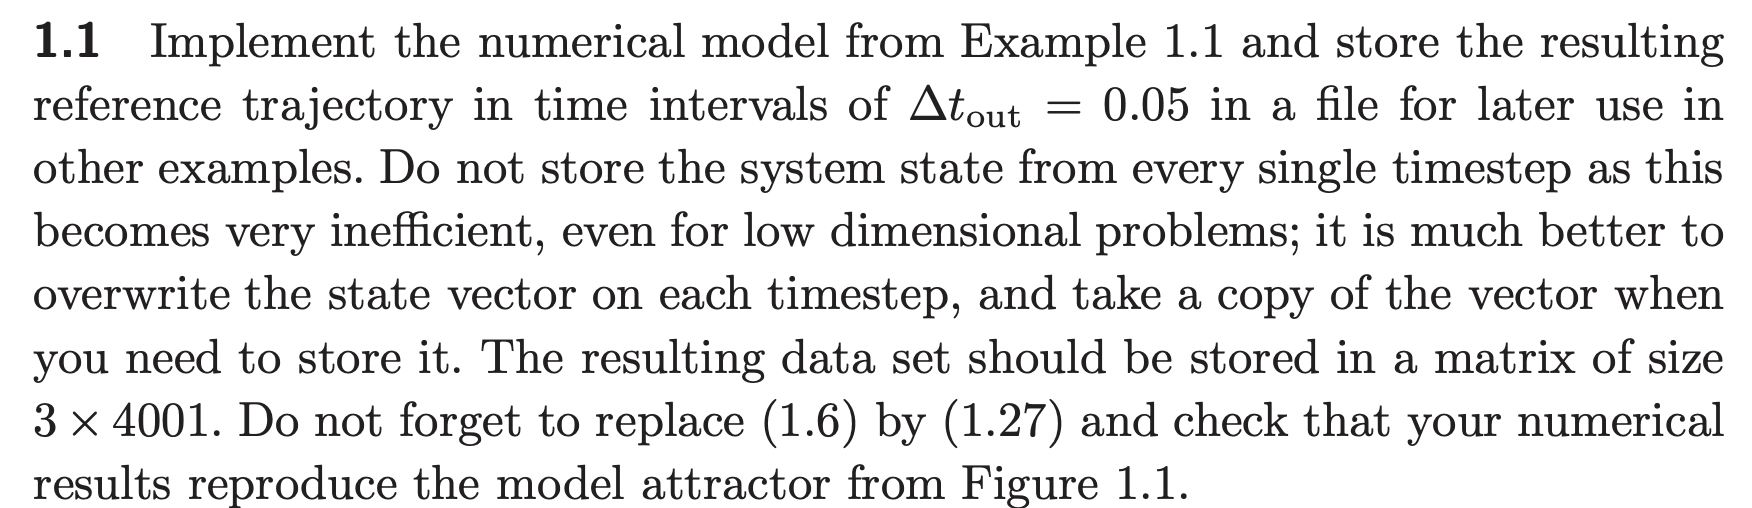

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import bokeh.io
import bokeh.plotting

bokeh.io.output_notebook()

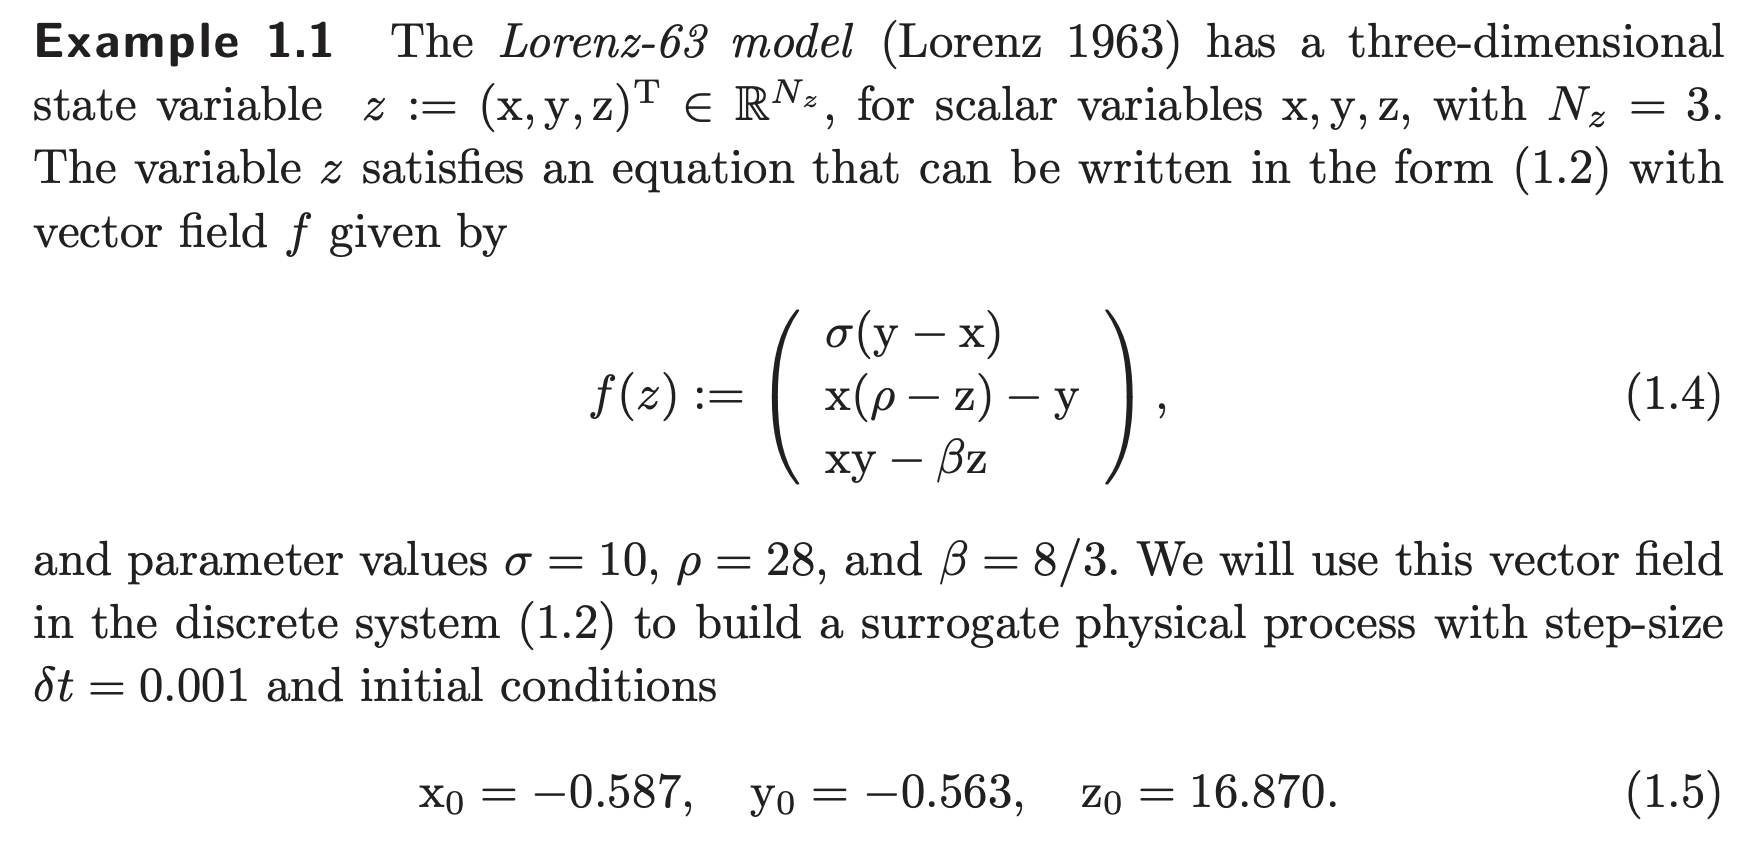

In [47]:
# Specify parameters
sigma = 10
beta = 8 / 3
rho = 28

dt = 0.001
t_out = 200

x_0 = -0.587
y_0 = -0.563
z_0 = 16.870

In [48]:
def g(t, dt, g_n):

    a = 1/(np.sqrt(dt))

    g_n1 = np.empty_like(g_n)

    for i in range(0, len(g_n)):
      
        if (g_n[i] < 0) and (g_n[i] >= -a/2):
            g_n1[i] = 2.0 * g_n[i] + a/2
        else:
            g_n1[i] = -2.0 * g_n[i] + a/2

    return g_n1

A numerical approximation such as the forward Euler scheme:

$z^{n+1} =z^n +δt(f(z^{n})+g(t_n)), t_n =nδt$

In [49]:
def bracets_func(x, y, z, g_n, sigma = 10, rho = 28, beta = 8/3): 
    bracets = np.array(
        [
          sigma * (y - x) + g_n[0],
          x * (rho - z) - y + g_n[1],
          x * y - beta * z + g_n[2]
        ])
    return bracets

In [88]:
def solve_lorenz_euler(sigma, beta, rho, x_0, y_0, z_0, dt, t_out, g_0):

    t = np.zeros(int(t_out/dt)+1,)

    x = np.zeros(int(t_out/dt)+1,)
    y = np.zeros(int(t_out/dt)+1,)
    z = np.zeros(int(t_out/dt)+1,)

    # Set initial points
    x[0] = x_0
    y[0] = y_0
    z[0] = z_0
    
    g_n = g_0

    for i in range(0, int(t_out/dt)):
        func_z = bracets_func(x[i], y[i], z[i], g_n)

        x[i+1] = x[i] + dt * func_z[0]
        y[i+1] = y[i] + dt * func_z[1]
        z[i+1] = z[i] + dt * func_z[2]

        t[i+1] = t[i] + dt

        g_n = g(t[i+1], dt, g_n)


    return np.array([x, y, z])

In [89]:
a = 1/np.sqrt(dt)

g_0 = np.array(
    [
      a * (1/np.sqrt(2)-1/2),
      a * (1/np.sqrt(3)-1/2),
      a * (1/np.sqrt(5)-1/2)
    ])

f_z = solve_lorenz_euler(sigma, beta, rho, x_0, y_0, z_0, dt, t_out, g_0)

# Plotting computed observation points

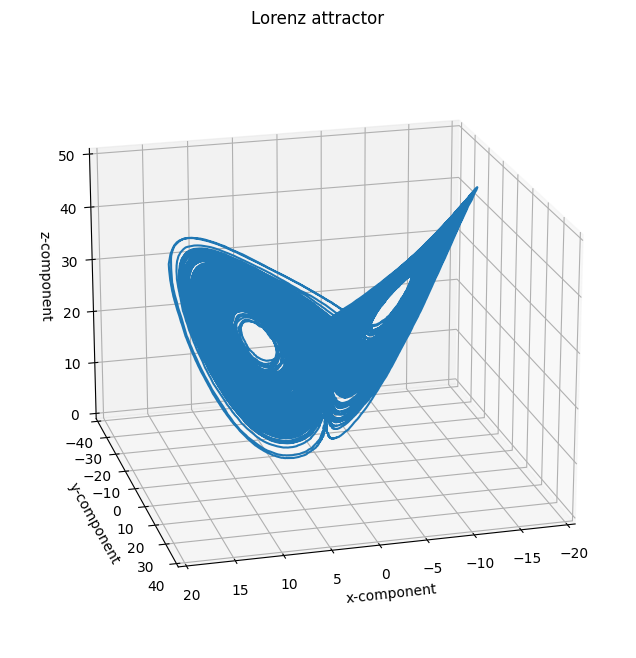

In [90]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection='3d')
ax.plot(f_z[0,:],f_z[1,:], f_z[2,:])

ax.set_xlim(-20,20)
ax.set_ylim(-40,40)
ax.set_zlim(0,50)

ax.set_xlabel('x-component')
ax.set_ylabel('y-component')
ax.set_zlabel('z-component')

ax.set_title('Lorenz attractor')

ax.view_init(20, 75);

#Store the resulting reference trajectory in time intervals of $dt_{out}$ = 0.05

In [91]:
t_out = 200
f_z = solve_lorenz_euler(sigma, beta, rho, x_0, y_0, z_0, dt, t_out, g_0)

In [96]:
f_z_out=[]

dt_out=0.05
delta_t=0.001

for i in range(0, f_z.shape[1], int(dt_out/delta_t)):

  f_z_out.append(f_z[:,i])


In [98]:
reference_trajectory = pd.DataFrame(f_z_out).transpose()
reference_trajectory.shape

(3, 4001)

In [100]:
reference_trajectory.head()

,0,1,2,3,4,5,6,7,8,9,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,4000
0,-0.587,-0.644430,-0.799711,-1.210797,-1.757757,-2.764016,-4.323397,-6.739472,-10.273564,-14.368675,...,13.772116,13.443860,10.845256,7.518991,4.708307,2.845087,1.772499,1.512787,1.568154,1.843386
1,-0.563,-0.841858,-1.317154,-2.157845,-3.301812,-5.167649,-8.150321,-12.678053,-18.220054,-21.936227,...,15.415540,10.048804,4.349825,1.159588,0.124451,0.221576,0.729157,1.259158,1.869538,2.823300
2,16.870,14.732475,12.944456,11.403270,10.053135,9.275471,9.119053,10.611152,15.525163,25.554049,...,32.197776,36.618994,36.181888,32.798550,28.830065,25.244253,22.144344,19.440026,17.067416,15.056437


In [101]:
from google.colab import files

reference_trajectory.to_csv('reference_trajectory.csv', encoding = 'utf-8-sig') 
files.download('reference_trajectory.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

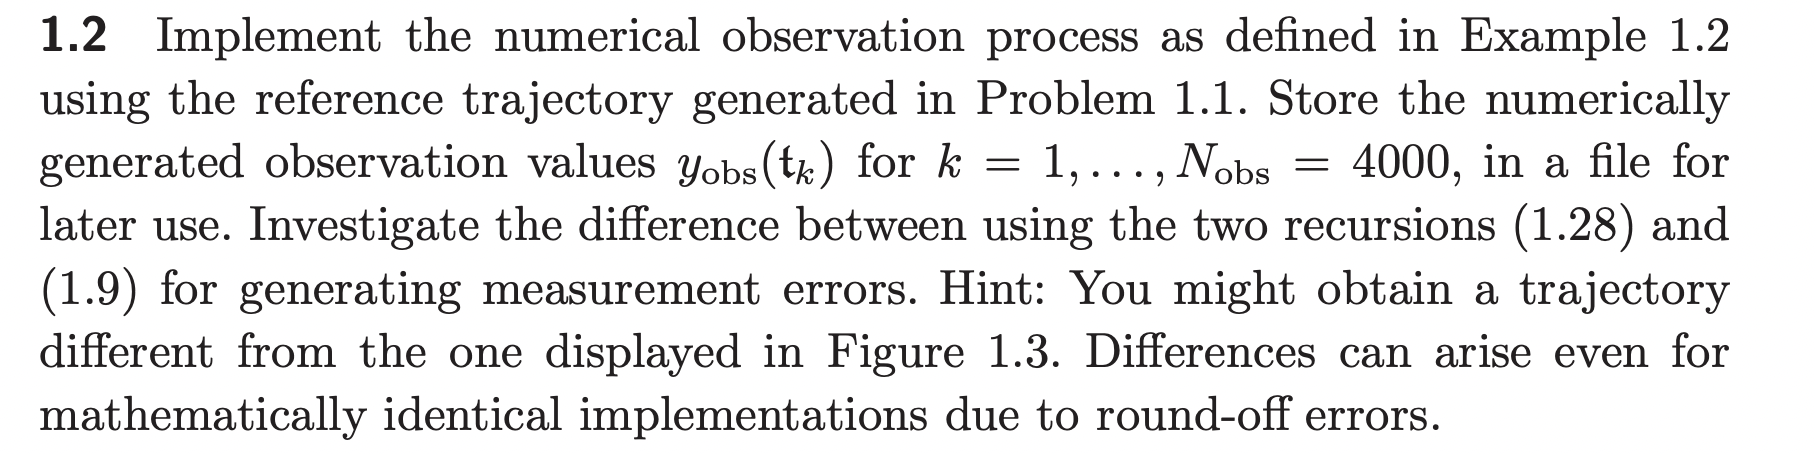